In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = (pd.read_excel("P4 stopp last 13 month.xlsx").drop(index=0)).reset_index()
del df['index']
len(df)  # 52710 rows
df.tail()

,Machine,Ordernumber,Article,Atriclenumber,Type,Workshift,Start time,Minutes,Stoptime,Total stoptime,Stopcause,Station,Comment
51705,P4,264950,MINIR ANTEX 15CM GAV GR� LAGR TRANSP,584515052,Roller,Natt,2022-02-01 04:22:36,0.018333,2022-02-01 04:22:37.100000,00:00:01.100000,Mikrostopp,NaN,NaN
51706,P4,264950,MINIR ANTEX 15CM GAV GR� LAGR TRANSP,584515052,Roller,Natt,2022-02-01 04:23:03,0.043333,2022-02-01 04:23:05.600000,00:00:02.600000,Mikrostopp,NaN,NaN
51707,P4,264950,MINIR ANTEX 15CM GAV GR� LAGR TRANSP,584515052,Roller,Natt,2022-02-01 04:33:49,0.101667,2022-02-01 04:33:55.100000,00:00:06.100000,Mikrostopp,NaN,NaN
51708,P4,264950,MINIR ANTEX 15CM GAV GR� LAGR TRANSP,584515052,Roller,Natt,2022-02-01 04:35:10,52.31,2022-02-01 05:27:28.600000,00:52:18.600000,Väntar på annan maskin,NaN,NaN
51709,P4,264950,MINIR ANTEX 15CM GAV GR� LAGR TRANSP,584515052,Roller,Natt,2022-02-01 05:27:28,0.028333,2022-02-01 05:27:29.725000,00:00:01.700000,Väntar på annan maskin,NaN,NaN


In [27]:
df['Start time'] = df['Start time'].astype('datetime64')
df['Minutes'] = df['Minutes'].astype('float')
df['Stoptime'] = df['Stoptime'].astype('datetime64')

In [28]:
#check missing value or error value and decide how to revise them 
df = df.replace({'-': None})
df.dtypes
df.isnull().sum()

Machine               0
Ordernumber        1336
Article             369
Atriclenumber       369
Type               1424
Workshift             0
Start time            0
Minutes               0
Stoptime              0
Total stoptime        0
Stopcause             0
Station           44940
Comment           51085
dtype: int64

In [29]:
# Filling missing values with above cells
#df_1 = df.fillna(method='ffill')
#df.isnull().sum()

In [30]:
df["month"] = pd.to_datetime(df["Stoptime"], format='%Y-%m-%d %H:%M:%S').dt.month
# df["Mh"] = df.Stoptime.dt.to_period('M')
df.head()

,Machine,Ordernumber,Article,Atriclenumber,Type,Workshift,Start time,Minutes,Stoptime,Total stoptime,Stopcause,Station,Comment,month
0,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 11:38:52.559,31.276667,2023-02-10 12:10:09.178,00:31:16.600000,Okategoriserat,NaN,NaN,2
1,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:55:15.469,7.640000,2023-02-10 11:02:53.886,00:07:38.400000,Okategoriserat,NaN,NaN,2
2,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:52:52.234,1.031667,2023-02-10 10:53:54.154,00:01:01.900000,Mikrostopp,NaN,NaN,2
3,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:50:05.449,0.163333,2023-02-10 10:50:15.225,00:00:09.800000,Mikrostopp,NaN,NaN,2
4,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:47:58.245,1.555000,2023-02-10 10:49:31.590,00:01:33.300000,Okategoriserat,NaN,NaN,2


In [31]:
df["day"] = df["Stoptime"].dt.day
df.head()

,Machine,Ordernumber,Article,Atriclenumber,Type,Workshift,Start time,Minutes,Stoptime,Total stoptime,Stopcause,Station,Comment,month,day
0,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 11:38:52.559,31.276667,2023-02-10 12:10:09.178,00:31:16.600000,Okategoriserat,NaN,NaN,2,10
1,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:55:15.469,7.640000,2023-02-10 11:02:53.886,00:07:38.400000,Okategoriserat,NaN,NaN,2,10
2,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:52:52.234,1.031667,2023-02-10 10:53:54.154,00:01:01.900000,Mikrostopp,NaN,NaN,2,10
3,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:50:05.449,0.163333,2023-02-10 10:50:15.225,00:00:09.800000,Mikrostopp,NaN,NaN,2,10
4,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:47:58.245,1.555000,2023-02-10 10:49:31.590,00:01:33.300000,Okategoriserat,NaN,NaN,2,10


## Reclassify stop causes

In [41]:
# Based on stop cause explanation file
def reclassify_stopcause(dataframe):
    dataframe["Stopcause"] = dataframe["Stopcause"].replace(["Lunch", "Rast", "Upplärning ny operatör", 
                                                             "Förbättringsgrupp", "Veckomöte", 
                       "Annan utbildning/möte", "Fackmöte", "Företagsinformation", "Planerad omställning", 
                       "Avslut av order", "Oplanerad omställning", "Uppstart av maskin", 
                       "Första / sistabitskontroll / timkontroll"],'Planerat stop')
    
    return dataframe


def machine(dataframe):
    dataframe["Stopcause"] = dataframe["Stopcause"].replace(["Vision","Systemfel","Inställning/justering","Verktygsbyte",
                                                         "Mekaniskt fel","Väntar på annan maskin",
                                                         "Tömning (Endast påläggningsmaskiner)","Elektriskt fel"], 'machine')
    return dataframe

def material_quality(dataframe):
    dataframe["Stopcause"] = dataframe["Stopcause"].replace(["Etikett","Råmaterial kvalitet","Förpacknings-material kvalitet","Väntar på material",
                                                         "Materialhantering","Sortering i samband med drift",
                                                         "Påfyllning material","Sortering ej vid drift"], 'material quality')  
    return dataframe

def support(dataframe):
    dataframe["Stopcause"] = dataframe["Stopcause"].replace(["Reparatör på plats","Planerat underhåll MED operatör",
                            "IT-infrastruktur (IT/nätverk/ERP/RS)","Fel efter installation/ombyggnad","Reparation gjord av operatör",
                            "Fel efter planerat underhåll", "Support vid annan maskin", "Väntar på underhåll", "Planerat underhåll UTAN operatör",
                            "Omgivning (el/gas/luft/ånga/brand)", "Installation/ombyggnad", "Kvalitetskontroll"], 'support function')    
    return dataframe

In [32]:
len(df['Stopcause'].unique())

46

In [33]:
df_reclassify = reclassify_stopcause(df)
# df_reclassify.head()

In [34]:
len(df_reclassify['Stopcause'].unique())

35

In [36]:
(df_reclassify['Stopcause'].unique())

array(['Okategoriserat', 'Mikrostopp', 'Reparatör på plats',
       'Planerat stop', 'Städning', 'Tömning (Endast påläggsmaskiner)',
       'Mekaniskt fel', 'Väntar på annan maskin', 'material quality',
       'Kvalitetsproblem', 'Vision', 'Väntar på underhåll',
       'Support vid annan maskin ', 'Elektriskt fel', 'Verktygsbyte',
       'Skiftöverlämning', 'Omgivning (el/gas/luft/ånga/brand)',
       'Inställning/justering', 'Personalbrist', 'Installation/ombyggnad',
       'Testproduktion', 'Ingen stopporsak', 'Truckhantering',
       'Kvalitetskontroll', 'Reparation gjord av operatör',
       'IT-infrastruktur (IT/nätverk/ERP/RS)',
       'Planerat underhåll MED operatör', 'Ingen planerad produktion',
       'Systemfel ', 'Planerat underhåll UTAN operatör',
       'Förpacknings-material kvalitet'], dtype=object)

In [42]:
df1 = material_quality(df_reclassify)

In [43]:
len(df1['Stopcause'].unique())

30

In [44]:
df1['Stopcause'].unique()

array(['Okategoriserat', 'Mikrostopp', 'Reparatör på plats',
       'Planerat stop', 'Städning', 'Tömning (Endast påläggsmaskiner)',
       'Mekaniskt fel', 'Väntar på annan maskin', 'material quality',
       'Kvalitetsproblem', 'Vision', 'Väntar på underhåll',
       'Support vid annan maskin ', 'Elektriskt fel', 'Verktygsbyte',
       'Skiftöverlämning', 'Omgivning (el/gas/luft/ånga/brand)',
       'Inställning/justering', 'Personalbrist', 'Installation/ombyggnad',
       'Testproduktion', 'Ingen stopporsak', 'Truckhantering',
       'Kvalitetskontroll', 'Reparation gjord av operatör',
       'IT-infrastruktur (IT/nätverk/ERP/RS)',
       'Planerat underhåll MED operatör', 'Ingen planerad produktion',
       'Systemfel ', 'Planerat underhåll UTAN operatör'], dtype=object)

In [45]:
df2 = support(df1)

In [46]:
len(df2['Stopcause'].unique())

22

In [ ]:
# "Vision","Systemfel","Inställning/justering","Verktygsbyte",
# "Mekaniskt fel","Väntar på annan maskin",
# "Tömning (Endast påläggningsmaskiner)","Elektriskt fel"], 'machine')

In [48]:
df2['Stopcause'].unique()

array(['Okategoriserat', 'Mikrostopp', 'support function',
       'Planerat stop', 'Städning', 'Tömning (Endast påläggsmaskiner)',
       'Mekaniskt fel', 'Väntar på annan maskin', 'material quality',
       'Kvalitetsproblem', 'Vision', 'Support vid annan maskin ',
       'Elektriskt fel', 'Verktygsbyte', 'Skiftöverlämning',
       'Inställning/justering', 'Personalbrist', 'Testproduktion',
       'Ingen stopporsak', 'Truckhantering', 'Ingen planerad produktion',
       'Systemfel '], dtype=object)

In [50]:
list = ['Okategoriserat','Mikrostopp','support function','Planerat stop','Städning','material quality',
        'Kvalitetsproblem','Support vid annan maskin ','Skiftöverlämning','Inställning/justering','Personalbrist',
       'Testproduktion', 'Ingen stopporsak', 'Truckhantering', 'Ingen planerad produktion','Systemfel ']

In [51]:
dataF = df2[df2['Stopcause'].isin(list) == False]

In [52]:
dataF.Stopcause.unique()

array(['Tömning (Endast påläggsmaskiner)', 'Mekaniskt fel',
       'Väntar på annan maskin', 'Vision', 'Elektriskt fel',
       'Verktygsbyte'], dtype=object)

In [53]:
dataF.isna

,Machine,Ordernumber,Article,Atriclenumber,Type,Workshift,Start time,Minutes,Stoptime,Total stoptime,Stopcause,Station,Comment,month,day
79,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Eftermiddag,2023-02-09 21:58:43.040,3.585000,2023-02-09 22:02:18.109,00:03:35.100000,Tömning (Endast påläggsmaskiner),NaN,NaN,2,9
83,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Eftermiddag,2023-02-09 21:28:43.920,1.958333,2023-02-09 21:30:41.410,00:01:57.500000,Mekaniskt fel,103. Matning gavel,NaN,2,9
95,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Eftermiddag,2023-02-09 20:35:30.301,2.628333,2023-02-09 20:38:08.021,00:02:37.700000,Mekaniskt fel,103. Nedmatning rullar,NaN,2,9
114,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Eftermiddag,2023-02-09 18:44:31.699,27.881667,2023-02-09 19:12:24.579,00:27:52.900000,Väntar på annan maskin,NaN,NaN,2,9
115,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Eftermiddag,2023-02-09 18:12:39.100,31.876667,2023-02-09 18:44:31.699,00:31:52.600000,Mekaniskt fel,101. Vävvagn,Nödstop,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51696,P4,264950,MINIR ANTEX 15CM GAV GR� LAGR TRANSP,584515052,Roller,Natt,2022-02-01 03:18:29.000,1.195000,2022-02-01 03:19:40.700,00:01:11.700000,Väntar på annan maskin,NaN,NaN,2,1
51701,P4,264950,MINIR ANTEX 15CM GAV GR� LAGR TRANSP,584515052,Roller,Natt,2022-02-01 04:14:46.000,2.285000,2022-02-01 04:17:03.100,00:02:17.100000,Mekaniskt fel,101. Rör utan väv,NaN,2,1
51704,P4,264950,MINIR ANTEX 15CM GAV GR� LAGR TRANSP,584515052,Roller,Natt,2022-02-01 04:21:05.000,1.296667,2022-02-01 04:22:22.800,00:01:17.800000,Mekaniskt fel,101. Rör utan väv,NaN,2,1
51708,P4,264950,MINIR ANTEX 15CM GAV GR� LAGR TRANSP,584515052,Roller,Natt,2022-02-01 04:35:10.000,52.310000,2022-02-01 05:27:28.600,00:52:18.600000,Väntar på annan maskin,NaN,NaN,2,1


In [59]:
(dataF.Station.unique())

array([nan, '103. Matning gavel', '103. Nedmatning rullar',
       '101. Vävvagn', '102. Pusher in/ut', '101. Avskärning väv',
       'Byte Avskärningskniv', '103. Montering gavel',
       '101. Drivning påläggningsdorn', '102. Uppmatning tak',
       '103. Montering lagring', '101. Rör utan väv',
       '101. Avskärningskniv', '101. Matning rörmagasin',
       '102. Avskjutning rullar', '102. Skopband',
       '101. Matning vävmagasin', '101. Låga slocknar',
       '101. Utmatningsband', 'Byte dorn/dorntapp', 'Byte klippkutter',
       'Byte karda', '102. Karda', '105. Frammatning 5-pack',
       '103. Matning lagring', 'Byte faskutter',
       '104. Sidomatning laddenhet', '102. Klippkutter', 'Byte kapkniv',
       '102. Faskutter', '101. Centreringsstång', '105. Plast 5-pack',
       '102. Värmeslinga', '104. Plast 1-pack', '104. Frammatning 1-pack',
       '102. Dorn ruggskåp', '102. Transportband tak',
       '103. Kontoll lagning', '104. Inmatning laddenhet', '102. Palett',
     

In [60]:
dataF.isnull().sum()

Machine              0
Ordernumber        138
Article             31
Atriclenumber       31
Type               169
Workshift            0
Start time           0
Minutes              0
Stoptime             0
Total stoptime       0
Stopcause            0
Station           2163
Comment           7860
month                0
day                  0
dtype: int64

# Unique values and counts in the columns

In [61]:
df.columns

Index(['Machine', 'Ordernumber', 'Article', 'Atriclenumber', 'Type',
       'Workshift', 'Start time', 'Minutes', 'Stoptime', 'Total stoptime',
       'Stopcause', 'Station', 'Comment', 'month', 'day'],
      dtype='object')

## Unique count

In [15]:
# unique values for column: article, article number, type, workshift, stop cause
df.Machine.unique() # We have just one machine type "P4" and no missing
len(df.Ordernumber.unique())   # 223 order number 
len(df.Article.unique())     # 44 article
len(df.Atriclenumber.unique())  # 46 article number
len(df.Type.unique())  # 2 types which  are 'Default' and 'Roller'
len(df.Workshift.unique())  # 4 shifts  which are Förmiddag', 'Eftermiddag', 'Natt', 'Övertid helg
len(df.Stopcause.unique())  # 46 causes of stop
len(df.Station.unique())   # 44 stations
df['Start time'].dt.year.unique()

array([2023, 2022], dtype=int64)

## Unique value

In [62]:
df_reclassify['Article'].unique()

array(['MINIR POLYAMID 10CM SPECIALBEHANLAD', None,
       'MINIR FILT 10 CM SPECIALBEHANDLAD', 'Tillfälligt artikelnummer',
       'MINIR ANLON 10CM GAV VIT LAGR TRANSP.',
       'MINIR ELON 10CM GAV VIT LAGR TRANSP',
       'MINIR RILON 10 CM GAV VIT LAGR TRANSP',
       'MINIR RILON 10CM GAV GR� LAGR TRANSP',
       'MINIR FILT 15 CM SPECIALBEHANDLAD',
       'MINIR ANTEX 15CM GAV GR� LAGR TRANSP',
       'MINIR RIMAX 15CM GAV GR� LAGR TRANSP',
       'MINIR MICMEX 15CM GAV GR� LAGR TRANSP',
       'MINIR 15 CM GAV GR� LAGR TRANSP',
       'MINIR FILT 5CM GAV GR� LAGR TRANSP KORT',
       'MINIRULLE ANTEX 5CM GAV GR� LAGR VIT',
       'MINIR MICROF 10CM GAV VIT LAGR TRANSP **',
       'MINIR ANLON 10CM GAV GR� LAGR TRANSP',
       'MINIR RIMAX 10CM GAV GR� LAGR TRANSP',
       'Antex - Sasol prov med Borealis recept', 'Antex - Borealis prov',
       'MINIR FILT 15CM GAV GR� LAGR TRANSP',
       'MINIR MICMEX 10CM GAV VIT LAGR TRANSP',
       'MINIR MICMEX 10CM GAV GR� LAGR TRANSP',


In [63]:
df_reclassify['Type'].unique()

array(['Default', None, 'Roller'], dtype=object)

In [64]:
df_reclassify['Workshift'].unique()

array(['Förmiddag', 'Eftermiddag', 'Natt', 'Övertid helg'], dtype=object)

In [65]:
df_reclassify['Stopcause'].unique()

array(['Okategoriserat', 'Mikrostopp', 'support function',
       'Planerat stop', 'Städning', 'Tömning (Endast påläggsmaskiner)',
       'Mekaniskt fel', 'Väntar på annan maskin', 'material quality',
       'Kvalitetsproblem', 'Vision', 'Support vid annan maskin ',
       'Elektriskt fel', 'Verktygsbyte', 'Skiftöverlämning',
       'Inställning/justering', 'Personalbrist', 'Testproduktion',
       'Ingen stopporsak', 'Truckhantering', 'Ingen planerad produktion',
       'Systemfel '], dtype=object)

# Occurence count and lasting time for stop causes

## Total occurence for each stop cause

In [67]:
# count the number of different stops for whole file  & find of the most occurred stops
df_reclassify['Stopcause'].value_counts()  # as shown above we have 46 stop causes

Mikrostopp                          38299
Mekaniskt fel                        5941
Planerat stop                        2601
Väntar på annan maskin                993
support function                      967
Tömning (Endast påläggsmaskiner)      872
Städning                              490
material quality                      424
Vision                                222
Kvalitetsproblem                      186
Okategoriserat                        168
Support vid annan maskin              157
Ingen stopporsak                      109
Inställning/justering                  76
Verktygsbyte                           64
Personalbrist                          54
Testproduktion                         34
Elektriskt fel                         20
Skiftöverlämning                       17
Truckhantering                          9
Systemfel                               6
Ingen planerad produktion               1
Name: Stopcause, dtype: int64

In [68]:
df_reclassify.groupby(['Stopcause', 'Workshift'])['Workshift'].count().unstack().fillna(0)

Workshift,Eftermiddag,Förmiddag,Natt,Övertid helg
Stopcause,,,,
Elektriskt fel,10.0,5.0,5.0,0.0
Ingen planerad produktion,1.0,0.0,0.0,0.0
Ingen stopporsak,25.0,14.0,59.0,11.0
Inställning/justering,33.0,31.0,12.0,0.0
Kvalitetsproblem,45.0,87.0,54.0,0.0
Mekaniskt fel,2252.0,1787.0,1777.0,125.0
Mikrostopp,15937.0,12834.0,8777.0,751.0
Okategoriserat,94.0,37.0,25.0,12.0
Personalbrist,13.0,37.0,3.0,1.0


In [70]:
df_reclassify.groupby(['Stopcause', 'month'])['month'].count().unstack().fillna(0)
# df_reclassify.groupby(['Stopcause', 'Mh'])['Mh'].count().unstack().fillna(0)

month,1,2,3,4,5,6,7,8,9,10,11,12
Stopcause,,,,,,,,,,,,
Elektriskt fel,0.0,2.0,4.0,6.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0
Ingen planerad produktion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Ingen stopporsak,1.0,15.0,13.0,7.0,5.0,1.0,42.0,0.0,0.0,17.0,1.0,7.0
Inställning/justering,5.0,17.0,23.0,2.0,1.0,4.0,2.0,1.0,11.0,4.0,5.0,1.0
Kvalitetsproblem,37.0,28.0,11.0,0.0,9.0,0.0,5.0,32.0,7.0,33.0,18.0,6.0
Mekaniskt fel,375.0,753.0,516.0,505.0,592.0,473.0,199.0,512.0,639.0,529.0,488.0,360.0
Mikrostopp,2678.0,4379.0,3886.0,3789.0,3333.0,3116.0,1528.0,3254.0,3745.0,3204.0,3542.0,1845.0
Okategoriserat,11.0,69.0,4.0,1.0,6.0,22.0,23.0,6.0,4.0,10.0,12.0,0.0
Personalbrist,1.0,0.0,4.0,3.0,4.0,3.0,9.0,8.0,2.0,7.0,4.0,9.0


In [71]:
df_reclassify.groupby(['Stopcause',  'Workshift', 'month'])['month'].count().unstack().fillna(0)
# df_reclassify.groupby(['Stopcause',  'Workshift', 'Mh'])['Mh'].count().unstack().fillna(0)

month                                      1     2     3     4     5     6   \
Stopcause                 Workshift                                           
Elektriskt fel            Eftermiddag     0.0   0.0   0.0   6.0   1.0   2.0   
                          Förmiddag       0.0   0.0   4.0   0.0   0.0   0.0   
                          Natt            0.0   2.0   0.0   0.0   2.0   0.0   
Ingen planerad produktion Eftermiddag     0.0   0.0   0.0   0.0   0.0   0.0   
Ingen stopporsak          Eftermiddag     1.0   6.0   6.0   3.0   4.0   0.0   
...                                       ...   ...   ...   ...   ...   ...   
material quality          Övertid helg    0.0   0.0   1.0   2.0   0.0   0.0   
support function          Eftermiddag    74.0  57.0  29.0  39.0  13.0   8.0   
                          Förmiddag     100.0  57.0  58.0  43.0  34.0  19.0   
                          Natt            2.0   3.0  10.0   6.0   3.0   0.0   
                          Övertid helg    0.0   2.0   0.0   5.0   0.0   0.0   

month                                     7     8     9     10    11    12  
Stopcause                 Workshift                                         
Elektriskt fel            Eftermiddag    1.0   0.0   0.0   0.0   0.0   0.0  
                          Förmiddag      0.0   0.0   0.0   0.0   0.0   1.0  
                          Natt           0.0   0.0   1.0   0.0   0.0   0.0  
Ingen planerad produktion Eftermiddag    0.0   0.0   1.0   0.0   0.0   0.0  
Ingen stopporsak          Eftermiddag    0.0   0.0   0.0   0.0   0.0   5.0  
...                                      ...   ...   ...   ...   ...   ...  
material quality          Övertid helg   0.0   3.0   0.0   1.0   1.0   0.0  
support function          Eftermiddag   17.0  12.0  14.0  20.0  34.0  44.0  
                          Förmiddag     10.0  47.0  44.0  43.0  60.0  32.0  
                          Natt           4.0   1.0   4.0   3.0   8.0   4.0  
                          Övertid helg   0.0   0.0   0.0   2.0   2.0   0.0  

[75 rows x 12 columns]

In [72]:
# Average time for each stop cause
df_reclassify.groupby(['Stopcause','Machine'])['Minutes'].mean().unstack()

Machine,P4
Stopcause,
Elektriskt fel,20.799667
Ingen planerad produktion,560.000000
Ingen stopporsak,7.263394
Inställning/justering,3.511623
Kvalitetsproblem,8.287115
Mekaniskt fel,3.321744
Mikrostopp,0.326133
Okategoriserat,100.121300
Personalbrist,202.304568


<AxesSubplot:title={'center':'Count of stop causes'}>

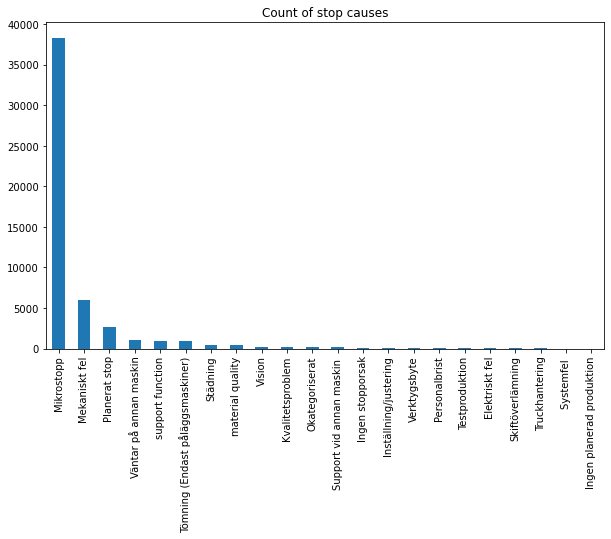

In [73]:
df_reclassify['Stopcause'].value_counts().plot(kind='bar', figsize=(10, 6), title = "Count of stop causes")

# Correlation

## For each month

In [75]:
df_permonth = df_reclassify.groupby(['month', 'Stopcause'])['Stopcause'].count().unstack().fillna(0)
# df_permonth = df_reclassify.groupby(['Mh', 'Stopcause'])['Stopcause'].count().unstack().fillna(0)

In [76]:
df_permonth

Stopcause,Elektriskt fel,Ingen planerad produktion,Ingen stopporsak,Inställning/justering,Kvalitetsproblem,Mekaniskt fel,Mikrostopp,Okategoriserat,Personalbrist,Planerat stop,...,Support vid annan maskin,Systemfel,Testproduktion,Truckhantering,Tömning (Endast påläggsmaskiner),Verktygsbyte,Vision,Väntar på annan maskin,material quality,support function
month,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,1.0,5.0,37.0,375.0,2678.0,11.0,1.0,238.0,...,5.0,0.0,9.0,2.0,105.0,0.0,36.0,126.0,19.0,176.0
2,2.0,0.0,15.0,17.0,28.0,753.0,4379.0,69.0,0.0,364.0,...,10.0,3.0,3.0,0.0,86.0,12.0,28.0,156.0,41.0,119.0
3,4.0,0.0,13.0,23.0,11.0,516.0,3886.0,4.0,4.0,337.0,...,9.0,1.0,0.0,0.0,74.0,2.0,16.0,71.0,72.0,97.0
4,6.0,0.0,7.0,2.0,0.0,505.0,3789.0,1.0,3.0,200.0,...,10.0,0.0,0.0,0.0,49.0,1.0,6.0,139.0,36.0,93.0
5,3.0,0.0,5.0,1.0,9.0,592.0,3333.0,6.0,4.0,207.0,...,9.0,0.0,1.0,0.0,57.0,22.0,11.0,142.0,48.0,50.0
6,2.0,0.0,1.0,4.0,0.0,473.0,3116.0,22.0,3.0,201.0,...,12.0,0.0,0.0,0.0,60.0,5.0,11.0,54.0,37.0,27.0
7,1.0,0.0,42.0,2.0,5.0,199.0,1528.0,23.0,9.0,71.0,...,4.0,0.0,0.0,0.0,30.0,1.0,11.0,31.0,35.0,31.0
8,0.0,0.0,0.0,1.0,32.0,512.0,3254.0,6.0,8.0,133.0,...,20.0,2.0,0.0,0.0,79.0,0.0,7.0,49.0,24.0,60.0
9,1.0,1.0,0.0,11.0,7.0,639.0,3745.0,4.0,2.0,244.0,...,16.0,0.0,0.0,1.0,100.0,3.0,38.0,71.0,30.0,62.0


Text(0, 0.5, 'Monthly count')

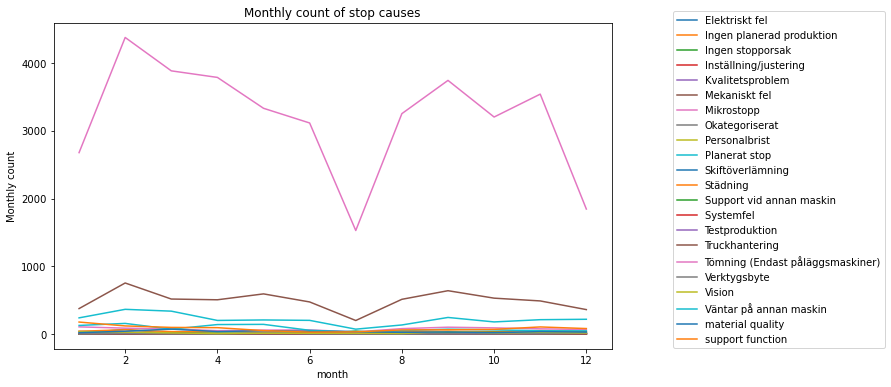

In [77]:
# With Mikrostopp
lines = df_permonth.plot(figsize=(10, 6))
lines.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Monthly count of stop causes")
plt.ylabel("Monthly count")

Text(0, 0.5, 'Monthly count')

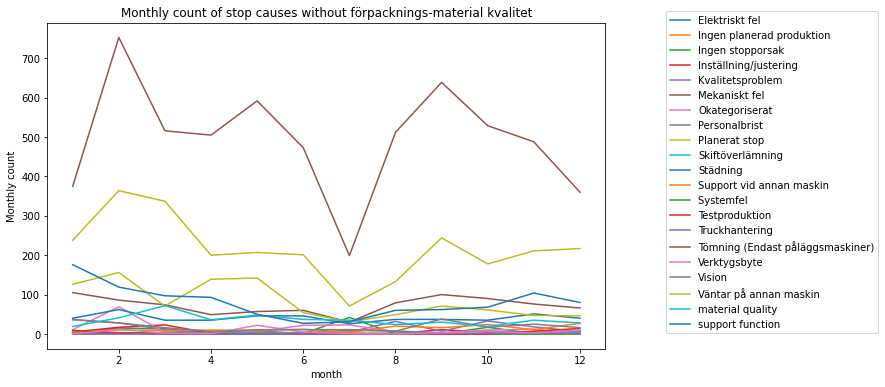

In [78]:
# Without förpacknings-material kvalitet
df_permonth_drop = df_permonth.drop(columns=['Mikrostopp'])
lines = df_permonth_drop.plot(figsize=(10, 6))
lines.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Monthly count of stop causes without förpacknings-material kvalitet")
plt.ylabel("Monthly count")

In [79]:
def calculate_correlation(data):
    corr = data.corr()
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(data.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels(data.columns)
    plt.figure(figsize=(10,6))
    plt.show()

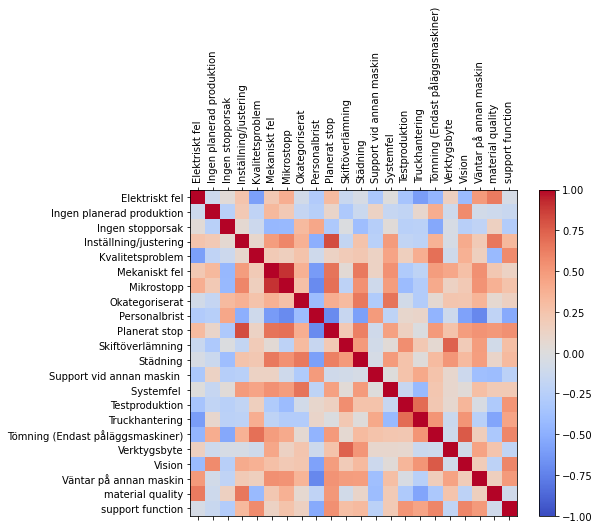

<Figure size 720x432 with 0 Axes>

In [80]:
calculate_correlation(df_permonth)


In [81]:
df_pershift = df_reclassify.groupby(['Workshift', 'Stopcause'])['Stopcause'].count().unstack().fillna(0)

Text(0, 0.5, 'Count per workshift')

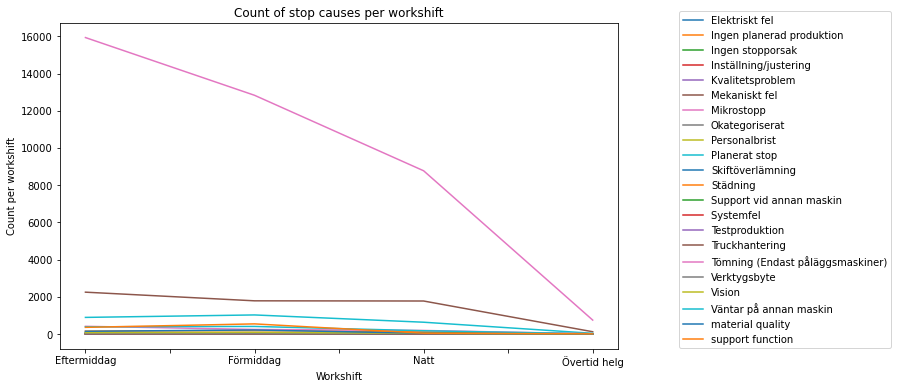

In [82]:
# With Mikrostopp
lines = df_pershift.plot(figsize=(10, 6))
lines.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Count of stop causes per workshift")
plt.ylabel("Count per workshift")

Text(0, 0.5, 'Count per workshift')

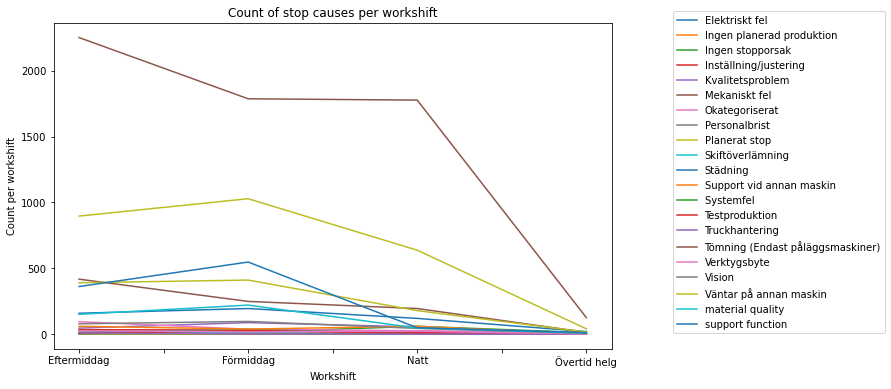

In [83]:
# Without förpacknings-material kvalitet
df_pershift_drop = df_pershift.drop(columns=['Mikrostopp'])
lines = df_pershift_drop.plot(figsize=(10, 6))
lines.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Count of stop causes per workshift")
plt.ylabel("Count per workshift")

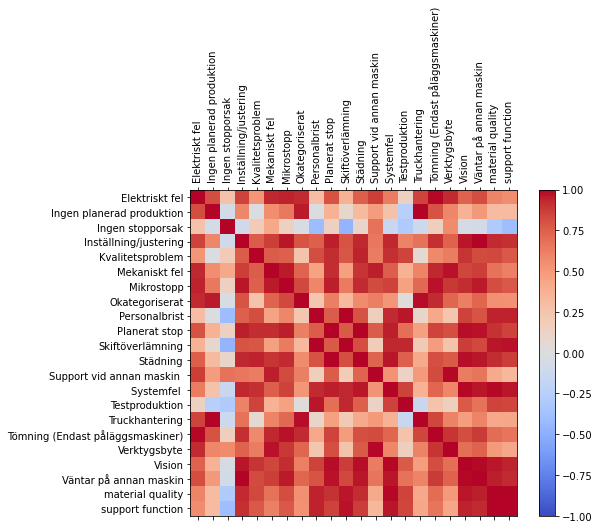

<Figure size 720x432 with 0 Axes>

In [84]:
calculate_correlation(df_pershift)

## Statistical test

In [85]:
# classify stopcause with excel file
# encode the stopcause
# implement test

In [86]:
from sklearn import preprocessing

def encoder(dataframe):
    le = preprocessing.LabelEncoder()
    le.fit(dataframe['Stopcause'])
    le.transform(dataframe['Stopcause'])
    dataframe["encoded_stopcause"] = le.transform(dataframe['Stopcause'])
    return dataframe

c:\Users\R\anaconda3\ANACONDA\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [87]:
df_reclassify = encoder(df_reclassify)
df_reclassify.head()

,Machine,Ordernumber,Article,Atriclenumber,Type,Workshift,Start time,Minutes,Stoptime,Total stoptime,Stopcause,Station,Comment,month,day,encoded_stopcause
0,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 11:38:52.559,31.276667,2023-02-10 12:10:09.178,00:31:16.600000,Okategoriserat,NaN,NaN,2,10,7
1,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:55:15.469,7.640000,2023-02-10 11:02:53.886,00:07:38.400000,Okategoriserat,NaN,NaN,2,10,7
2,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:52:52.234,1.031667,2023-02-10 10:53:54.154,00:01:01.900000,Mikrostopp,NaN,NaN,2,10,6
3,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:50:05.449,0.163333,2023-02-10 10:50:15.225,00:00:09.800000,Mikrostopp,NaN,NaN,2,10,6
4,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:47:58.245,1.555000,2023-02-10 10:49:31.590,00:01:33.300000,Okategoriserat,NaN,NaN,2,10,7


In [88]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform one-way ANOVA, check whether PR(>F) is smaller than 0.05
model = ols('encoded_stopcause ~ C(month) + C(day) + C(Workshift)'
            , data=df_reclassify).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(month),3701.799316,11.0,29.364212,1.979662e-62
C(day),2109.710706,30.0,6.136204,5.052908e-24
C(Workshift),3553.610344,3.0,103.358624,1.039686e-66
Residual,592104.369450,51665.0,NaN,NaN
